In [ ]:
#importing the required python libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
heart_data=pd.read_csv('/content/drive/MyDrive/data/Document from Rahul')

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
heart_data.shape

(303, 14)

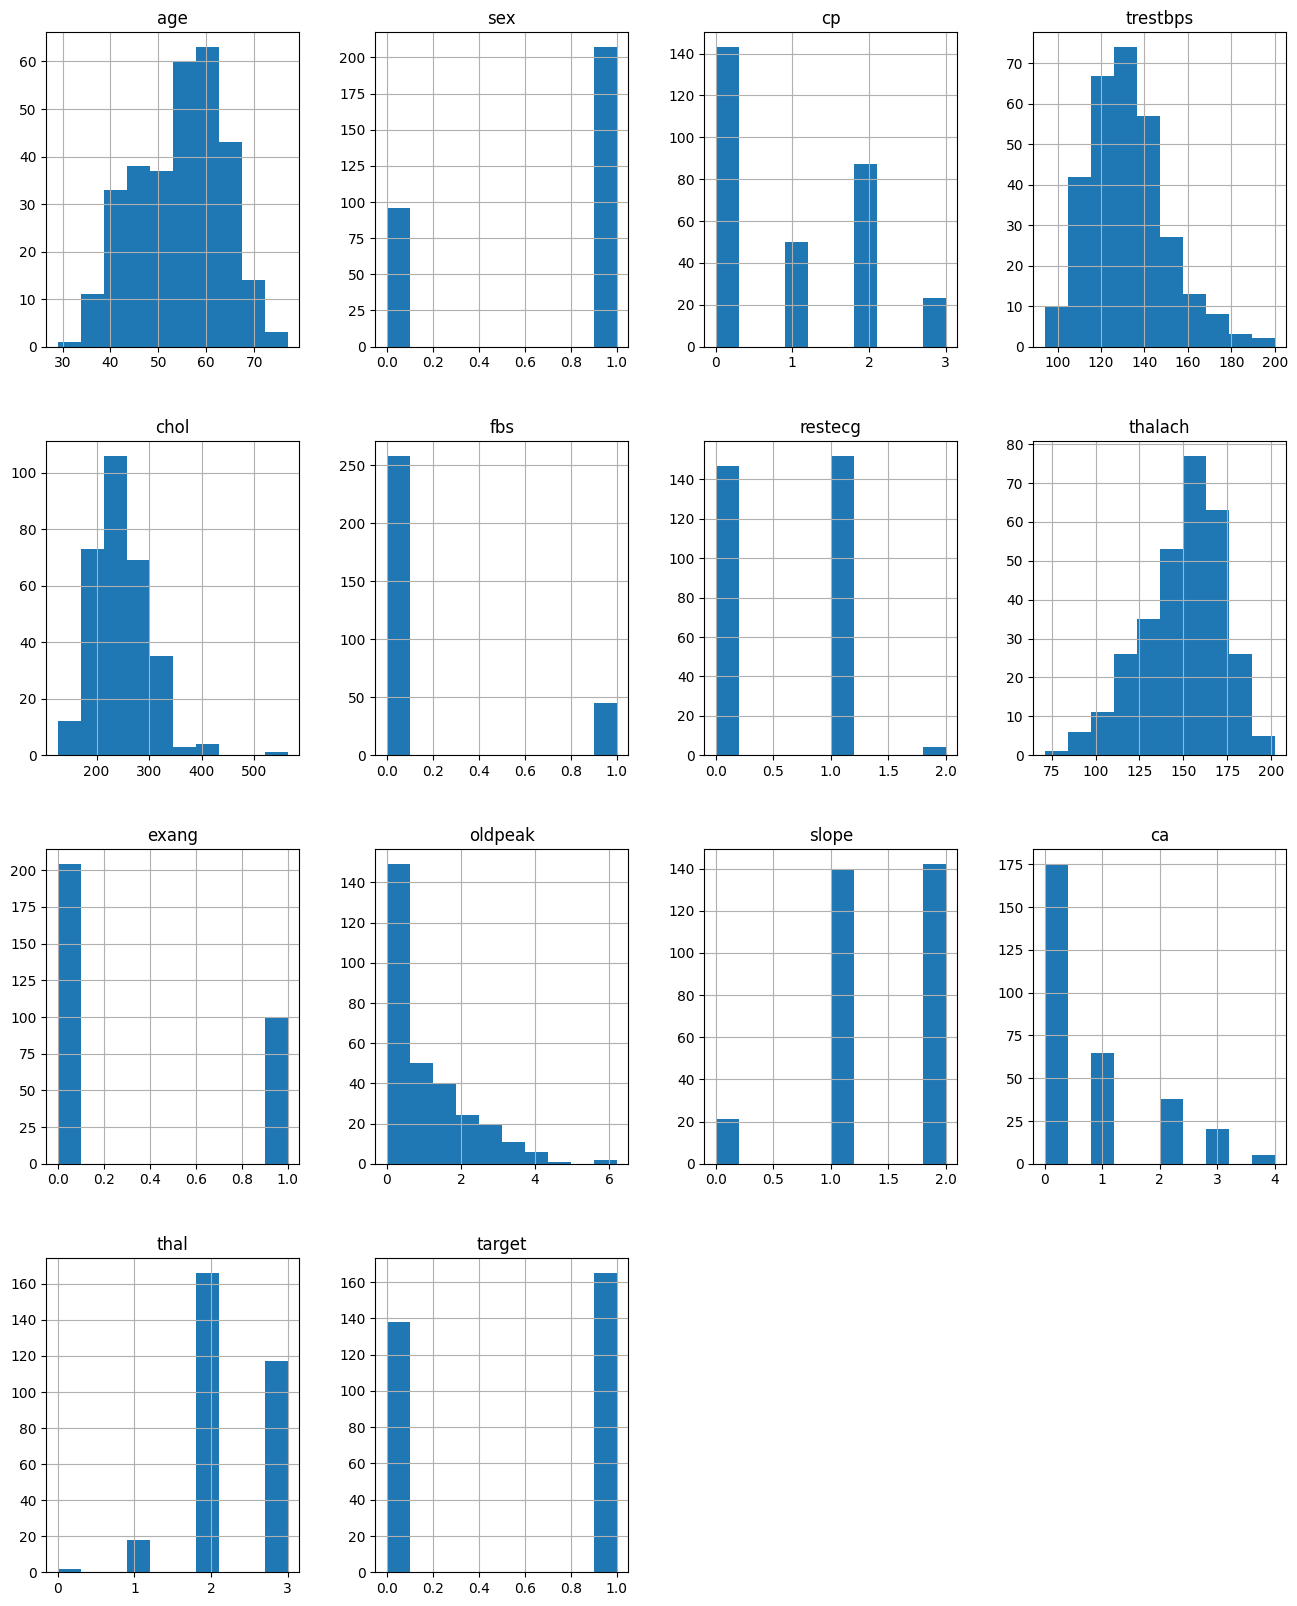

In [ ]:
import matplotlib.pyplot as plt
h=heart_data.hist(figsize=(16,20))

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heart_data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


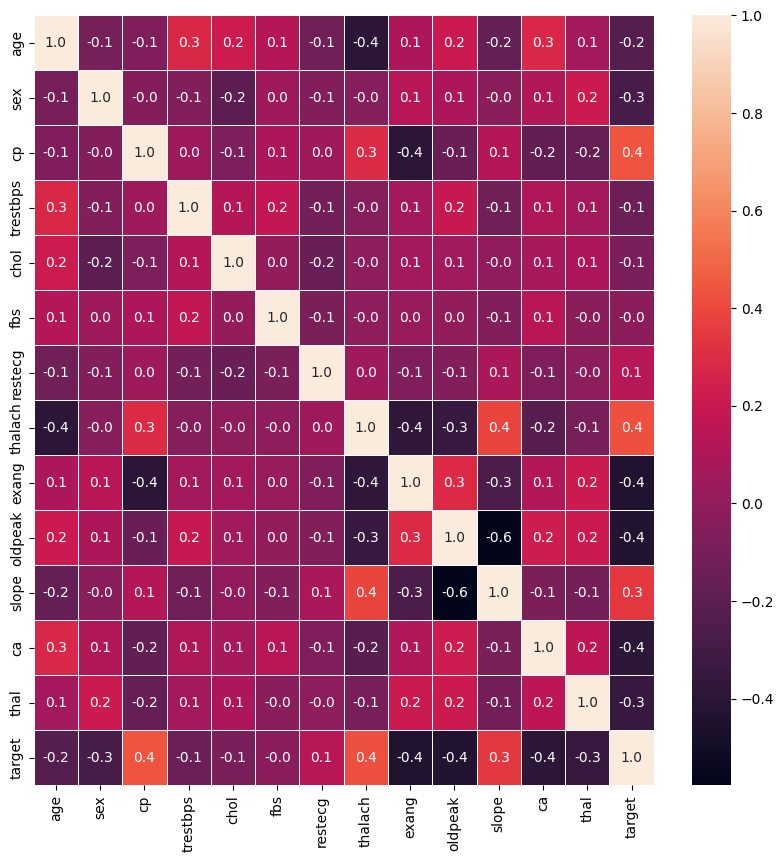

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(heart_data.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

In [ ]:
# Defining variables to train and test
X_train, X_test, Y_train, Y_test = train_test_split(heart_data.drop('target', axis=1), heart_data['target'], test_size=0.2, random_state=42)

In [ ]:
model=RandomForestClassifier(max_depth=5)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data:: ',training_data_accuracy)

Accuracy score of training data::  0.9462809917355371


In [ ]:
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of training data:: ',testing_data_accuracy)

Accuracy score of training data::  0.8688524590163934


In [ ]:
from sklearn.metrics import classification_report
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of training data:: ',testing_data_accuracy)
print(classification_report(Y_test, X_test_prediction))

Accuracy score of training data::  0.8688524590163934
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [ ]:
import pickle

In [ ]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [ ]:
for column in X_train.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
